## Imports

In [1]:
from plot_utils import *

import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


from sklearn import datasets

from sklearn.model_selection import train_test_split

import math

import seaborn as sn

## Read Population Data

In [2]:
us_pop = pd.read_csv('2019_US_Pop.csv')

## Google Mobility Data

In [3]:
global_mobility = pd.read_csv('Global_Mobility_Report.csv', low_memory=False)
usa_mobility = global_mobility[global_mobility['country_region_code'] == 'US']

usa_mobility = usa_mobility.rename(columns={'sub_region_1': 'state'})

In [4]:
unneeded = ['country_region_code', 'country_region', 'sub_region_2', 'metro_area', 'iso_3166_2_code','census_fips_code']

for field in unneeded:
    usa_mobility.pop(field)
    
usa_mobility = usa_mobility[usa_mobility['state'].notna()]

In [5]:
usa_mobility['date'] = usa_mobility['date'].map(pd.to_datetime)
dates_to_month_str(usa_mobility)
usa_mobility

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1329714,Alabama,2020-02,5.0,2.0,39.0,7.0,2.0,-1.0
1329715,Alabama,2020-02,0.0,-2.0,-7.0,3.0,-1.0,1.0
1329716,Alabama,2020-02,3.0,0.0,17.0,7.0,-17.0,4.0
1329717,Alabama,2020-02,-4.0,-3.0,-11.0,-1.0,1.0,2.0
1329718,Alabama,2020-02,4.0,1.0,6.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1812809,Wyoming,2020-08,NaN,NaN,NaN,NaN,-27.0,NaN
1812810,Wyoming,2020-08,NaN,NaN,NaN,NaN,-22.0,NaN
1812811,Wyoming,2020-08,NaN,NaN,NaN,NaN,-24.0,NaN
1812812,Wyoming,2020-08,NaN,NaN,NaN,NaN,-24.0,NaN


In [6]:
usa_mobility = usa_mobility.groupby(by=['state','date']).mean()

usa_mobility

retail_and_recreation_percent_change_from_baseline  \
state   date                                                          
Alabama 2020-02                                           5.004608    
        2020-03                                          -6.888827    
        2020-04                                         -27.670348    
        2020-05                                          -6.477370    
        2020-06                                          -1.270361    
...                                                            ...    
Wyoming 2020-04                                         -34.505017    
        2020-05                                          -8.718644    
        2020-06                                          11.122324    
        2020-07                                          20.284058    
        2020-08                                          20.816993    

                 grocery_and_pharmacy_percent_change_from_baseline  \
state   date                                                         
Alabama 2020-02                                          -0.298429   
        2020-03                                           6.332132   
        2020-04                                          -1.923012   
        2020-05                                           8.660637   
        2020-06                                           6.496705   
...                                                            ...   
Wyoming 2020-04                                          -8.355263   
        2020-05                                           7.165714   
        2020-06                                          20.786982   
        2020-07                                          27.491429   
        2020-08                                          24.717949   

                 parks_percent_change_from_baseline  \
state   date                                          
Alabama 2020-02                           12.599078   
        2020-03                           20.586375   
        2020-04                            3.710462   
        2020-05                           36.619632   
        2020-06                           44.950000   
...                                             ...   
Wyoming 2020-04                           -0.776860   
        2020-05                           53.236364   
        2020-06                          156.206897   
        2020-07                          236.488889   
        2020-08                          244.454545   

                 transit_stations_percent_change_from_baseline  \
state   date                                                     
Alabama 2020-02                                       6.449231   
        2020-03                                      -3.152493   
        2020-04                                     -26.964387   
        2020-05                                      -6.299854   
        2020-06                                       4.349158   
...                                                        ...   
Wyoming 2020-04                                     -10.286275   
        2020-05                                       3.737410   
        2020-06                                      22.855513   
        2020-07                                      33.003650   
        2020-08                                      39.418033   

                 workplaces_percent_change_from_baseline  \
state   date                                               
Alabama 2020-02                                -0.043944   
        2020-03                               -11.712020   
        2020-04                               -33.469239   
        2020-05                               -24.902001   
        2020-06                               -20.877947   
...                                                  ...   
Wyoming 2020-04                               -33.250000   
        2020-05                               -25.006745   
       

## Read and Clean BLS Data

In [7]:
unemployment = pd.read_csv('state_unemployment_rate_S.csv')
unemployment.pop('Unnamed: 0')

unemployment = unemployment.rename(columns = {"Date":"date", "State":"state"}) 

unemployment['date'] = unemployment['date'].map(str_to_date)

feb_unemployment = unemployment[unemployment['date'] == '2020-02-01']
feb_unemployment = feb_unemployment[['state', 'Unemployment Rate (S)']]
feb_unemployment = feb_unemployment.rename(columns = {"Unemployment Rate (S)":"Baseline Unemployment"}) 

## Read and Clean Covid Data

In [8]:
covid = pd.read_csv('https://api.covidtracking.com/v1/states/daily.csv')

# Get rid of columns with deprecated fields
deprecated_fields = ['checkTimeEt', 'commercialScore', 'dateChecked',
                     'dateModified', 'grade', 'hospitalized', 'negativeIncrease',
                     'negativeRegularScore', 'negativeScore', 'posNeg',
                     'positiveScore', 'score', 'total']

for field in deprecated_fields:
    covid.pop(field)

# Correct type of date column    
fix_date_type(covid)

# Change state codes into state names
fix_state_code(covid)

covid = pd.merge(covid,us_pop,on='state')

## Merge/Clean Covid/BLS Data

In [9]:
data = pd.merge(covid,unemployment,on=['state','date'])

# Get rid of columns that we aren't going to regress on
unimportant = ['fips', 'hash','dataQualityGrade', 'lastUpdateEt']

for field in unimportant:
    data.pop(field)
    
data = data[['date',
             'state', 
             'Population',
             'positiveIncrease',
             'totalTestResultsIncrease',
             'deathIncrease',
             'hospitalizedIncrease',
             'Unemployment Rate (S)']]

data.dropna()

dates_to_month_str(data)
data.groupby(by=["state",'date']).mean()

data = data.sort_values(['state','date'])

data['Unemployment Rate Change'] = data.groupby(['state'])['Unemployment Rate (S)'].diff()

data

,date,state,Population,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,Unemployment Rate (S),Unemployment Rate Change
5,2020-04,Alabama,4903185,96,495,13,0,13.8,NaN
4,2020-05,Alabama,4903185,139,4737,10,30,9.6,-4.2
3,2020-06,Alabama,4903185,460,5970,15,12,7.5,-2.1
2,2020-04,Alaska,731545,14,890,0,2,13.5,NaN
1,2020-05,Alaska,731545,9,1206,0,0,12.7,-0.8
...,...,...,...,...,...,...,...,...,...
150,2020-05,Wisconsin,5822434,498,3670,11,32,12.1,-1.5
149,2020-06,Wisconsin,5822434,172,3664,3,20,8.5,-3.6
157,2020-04,Wyoming,578759,21,240,0,1,9.6,NaN
156,2020-05,Wyoming,578759,15,249,0,0,8.8,-0.8


In [10]:

data.iloc[:,3:7] = data.iloc[:,3:7].divide(data.iloc[:,2], axis=0) * 100000

data = pd.merge(data,feb_unemployment,on='state')

data["Label"] = (data['Unemployment Rate (S)'] - data["Baseline Unemployment"]) # / (data["Baseline Unemployment"])

data.dropna()

,date,state,Population,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,Unemployment Rate (S),Unemployment Rate Change,Baseline Unemployment,Label
1,2020-05,Alabama,4903185,2.834892,96.610672,0.203949,0.611847,9.6,-4.2,2.7,6.9
2,2020-06,Alabama,4903185,9.381657,121.757592,0.305924,0.244739,7.5,-2.1,2.7,4.8
4,2020-05,Alaska,731545,1.230273,164.856571,0.000000,0.000000,12.7,-0.8,5.8,6.9
5,2020-06,Alaska,731545,4.511001,341.058992,0.000000,0.000000,12.4,-0.3,5.8,6.6
7,2020-05,Arizona,7278717,4.313947,42.493753,0.137387,0.673196,9.0,-4.4,4.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...
151,2020-06,West Virginia,1792147,0.390593,26.392924,0.000000,0.000000,10.4,-2.5,4.9,5.5
153,2020-05,Wisconsin,5822434,8.553124,63.032058,0.188924,0.549598,12.1,-1.5,3.5,8.6
154,2020-06,Wisconsin,5822434,2.954091,62.929009,0.051525,0.343499,8.5,-3.6,3.5,5.0
156,2020-05,Wyoming,578759,2.591752,43.023089,0.000000,0.000000,8.8,-0.8,3.7,5.1


# Adding Google Mobility Data to Regressions

## Merging Google Mobility Data

In [11]:
final_data = pd.merge(usa_mobility, data, on=['state','date'])

In [12]:
make_categorical(final_data)
final_data.dropna()
final_data

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Population,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,Unemployment Rate (S),Unemployment Rate Change,Baseline Unemployment,Label
0,Alabama,2020-04,-27.670348,-1.923012,3.710462,-26.964387,-33.469239,14.047445,4903185,1.957911,10.095479,0.265134,0.000000,13.8,1,2.7,11.1
1,Alabama,2020-05,-6.477370,8.660637,36.619632,-6.299854,-24.902001,8.838235,4903185,2.834892,96.610672,0.203949,0.611847,9.6,0,2.7,6.9
2,Alabama,2020-06,-1.270361,6.496705,44.950000,4.349158,-20.877947,6.487778,4903185,9.381657,121.757592,0.305924,0.244739,7.5,0,2.7,4.8
3,Alaska,2020-04,-29.540373,-11.680982,28.852459,-51.700000,-33.101266,14.839695,731545,1.913758,121.660322,0.000000,0.273394,13.5,1,5.8,7.7
4,Alaska,2020-05,0.917160,10.832215,97.242424,-35.661290,-23.911672,7.489209,731545,1.230273,164.856571,0.000000,0.000000,12.7,0,5.8,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Wisconsin,2020-05,-15.082244,5.709180,82.270492,-11.008389,-28.603424,11.790885,5822434,8.553124,63.032058,0.188924,0.549598,12.1,0,3.5,8.6
154,Wisconsin,2020-06,6.149331,14.316054,146.639535,4.644809,-19.571499,6.737245,5822434,2.954091,62.929009,0.051525,0.343499,8.5,0,3.5,5.0
155,Wyoming,2020-04,-34.505017,-8.355263,-0.776860,-10.286275,-33.250000,13.713514,578759,3.628453,41.468038,0.000000,0.172783,9.6,1,3.7,5.9
156,Wyoming,2020-05,-8.718644,7.165714,53.236364,3.737410,-25.006745,8.301020,578759,2.591752,43.023089,0.000000,0.000000,8.8,0,3.7,5.1


## Making Train/Test Split

In [13]:
cols = final_data.columns.to_list()

features = cols[2:8] + cols[9:13]

split_date = "2020-06-01"
train_data = final_data[final_data.date < split_date]
test_data = final_data[final_data.date >= split_date]

X_train = train_data[features]
y_train = train_data["Label"]

X_test = test_data[features]
y_test = test_data["Label"]

len(y_test)

51

<AxesSubplot:>

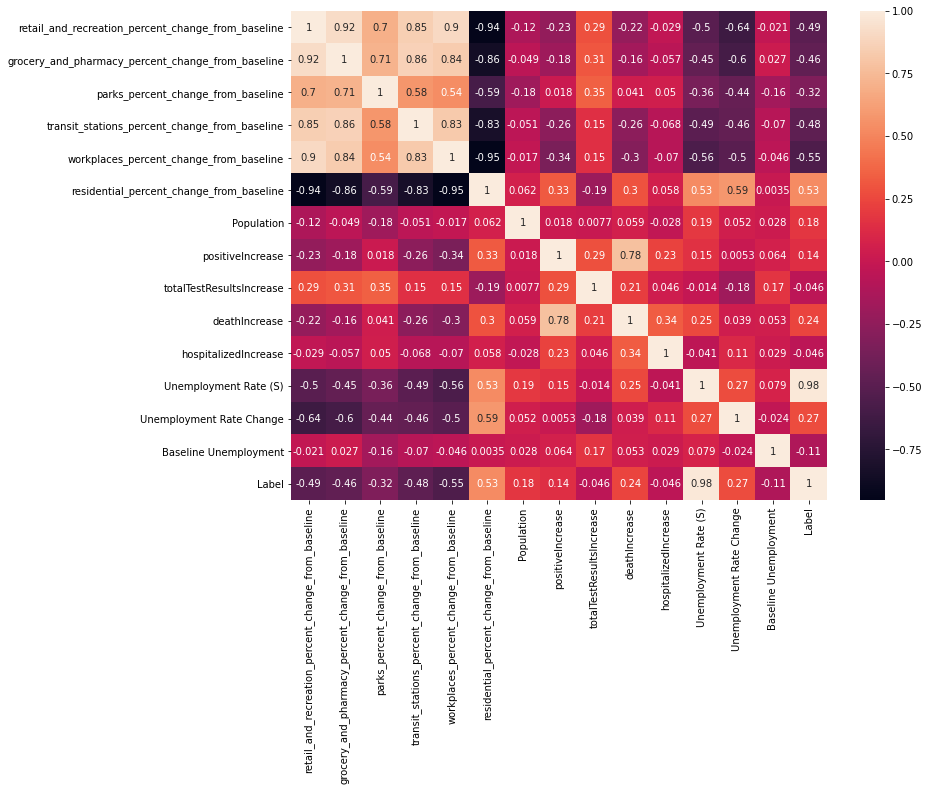

In [14]:
corr_matrix = final_data.corr()
plt.figure(figsize=(12, 9))
sn.heatmap(corr_matrix, annot=True)

# plt.show()

## Linear Regression

In [15]:
lin_model = LinearRegression()

lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
train_pred = lin_model.predict(X_train)

In [17]:
linear_reg_summary(final_data,y_train,train_pred)

R^2 is :                   0.3633632714585425
Adjusted R2 is :           0.28605738299279415
MSE is :                   12.219924214249021
Mean absolute error is :   2.4261021297054217
Median absolute error is : 1.5978882703143729


In [18]:
test_pred = lin_model.predict(X_test)

In [19]:
linear_reg_summary(final_data,y_test,test_pred)

R^2 is :                   -0.2064872185527442
Adjusted R2 is :           -0.3529892379484345
MSE is :                   11.111371560207559
Mean absolute error is :   2.4887820547846964
Median absolute error is : 2.133999380190062


In [20]:
# plt.plot(y_test, test_guess, 'o')
# lin_model.coef_

for i in range(len(features)):
    print("{}: {}".format(features[i], lin_model.coef_[i]))

retail_and_recreation_percent_change_from_baseline: 0.11784050647147737
grocery_and_pharmacy_percent_change_from_baseline: 0.03123340944801735
parks_percent_change_from_baseline: -0.022354314837441703
transit_stations_percent_change_from_baseline: 0.006645224748666228
workplaces_percent_change_from_baseline: -0.40720508916963494
residential_percent_change_from_baseline: 0.11734542207303983
positiveIncrease: -0.19095737916248073
totalTestResultsIncrease: 0.003305554205045184
deathIncrease: 2.847949120770051
hospitalizedIncrease: -0.0254905448524328


## Lasso

In [21]:
# Y = final_data['Unemployment Rate (S)'].to_numpy()
# X = final_data.drop(columns = ['date','state','Unemployment Rate (S)','Unemployment Rate Change','Population']).to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [22]:
lasso_model = Lasso(alpha = 2.8)

In [23]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=2.8, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
train_guess = lasso_model.predict(X_train)

In [25]:
linear_reg_summary(final_data,y_train,train_guess)

R^2 is :                   0.26403762312889745
Adjusted R2 is :           0.17467076308026352
MSE is :                   14.126430453529519
Mean absolute error is :   2.591126516516914
Median absolute error is : 1.7132092841564681


In [26]:
test_guess = lasso_model.predict(X_test)

In [27]:
linear_reg_summary(final_data,y_test,test_guess)

R^2 is :                   0.006036319301416682
Adjusted R2 is :           -0.11465927049769697
MSE is :                   9.154095960371452
Mean absolute error is :   2.3687474811957214
Median absolute error is : 2.094771217313612


In [28]:
# lasso_model.coef_

for i in range(len(features)):
    print("{}: {}".format(features[i], lasso_model.coef_[i]))

retail_and_recreation_percent_change_from_baseline: -0.0
grocery_and_pharmacy_percent_change_from_baseline: 0.0
parks_percent_change_from_baseline: -0.01065656762645605
transit_stations_percent_change_from_baseline: -0.0
workplaces_percent_change_from_baseline: -0.201821282645783
residential_percent_change_from_baseline: 0.0
positiveIncrease: -0.0026800551156664007
totalTestResultsIncrease: 0.0014697704498972432
deathIncrease: 0.0
hospitalizedIncrease: -0.01090473437089133


x axis penalization strength
y axis some performance metric (mse, misclassification rate)
2 lines: one one train one on test

## Ridge

In [29]:
# Y = final_data['Unemployment Rate (S)'].to_numpy()
# X = final_data.drop(columns = ['date','state','Unemployment Rate (S)','Unemployment Rate Change','Population']).to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [30]:
ridge_model = Ridge(alpha = 10000)

ridge_model.fit(X_train, y_train)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
train_guess = ridge_model.predict(X_train)

linear_reg_summary(final_data,y_train,train_guess)

R^2 is :                   0.21743815719086335
Adjusted R2 is :           0.12241279056403964
MSE is :                   15.020883941143804
Mean absolute error is :   2.700077639841592
Median absolute error is : 1.8527418816145627


In [32]:
test_guess = ridge_model.predict(X_test)

linear_reg_summary(final_data,y_test,test_guess)

R^2 is :                   0.036075600073361636
Adjusted R2 is :           -0.08097236277487307
MSE is :                   8.877443539255157
Mean absolute error is :   2.3410360645541264
Median absolute error is : 1.91920939249799


In [33]:
for i in range(len(features)):
    print("{}: {}".format(features[i], ridge_model.coef_[i]))

retail_and_recreation_percent_change_from_baseline: -0.024611174086599595
grocery_and_pharmacy_percent_change_from_baseline: -0.008413293041217929
parks_percent_change_from_baseline: -0.011526358407898845
transit_stations_percent_change_from_baseline: -0.028971222514012483
workplaces_percent_change_from_baseline: -0.06229975193095538
residential_percent_change_from_baseline: 0.02057362917232894
positiveIncrease: -0.009979557853942417
totalTestResultsIncrease: 0.0038680535438911116
deathIncrease: 0.003259395464246498
hospitalizedIncrease: -0.01271488495442646


## Logistic Regression

In [34]:
# Y = final_data['Unemployment Rate Change'].to_numpy()
# X = final_data.drop(columns = ['date','state','Unemployment Rate (S)','Unemployment Rate Change','Population']).to_numpy()

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [35]:
y_train = train_data['Unemployment Rate Change']
y_test = test_data['Unemployment Rate Change']

In [36]:
# Increase max_iter??
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
train_guess = log_model.predict(X_train)

In [38]:
log_reg_summary(y_train,train_guess)

Accuracy score is : 0.9065420560747663
Precision score is : 0.9333333333333333
Recall score is : 0.9032258064516129
F1 score is : 0.9180327868852459
ROC AUC is : 0.907168458781362


In [39]:
test_guess = log_model.predict(X_test)

In [40]:
log_reg_summary(y_test,test_guess)

Accuracy score is : 0.8235294117647058
Precision score is : 0.25
Recall score is : 0.14285714285714285
F1 score is : 0.18181818181818182
ROC AUC is : 0.5373376623376623


In [41]:
null_pred = np.zeros(len(y_test))
log_reg_summary(y_test, null_pred)
#print(null_pred)

Accuracy score is : 0.8627450980392157
Precision score is : 0.0
Recall score is : 0.0
F1 score is : 0.0
ROC AUC is : 0.5


/Users/samirsingh/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logisitic with L1 Penalty

In [42]:
log_l1_model = LogisticRegression(max_iter=1000,penalty='l1',solver='liblinear')

log_l1_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
train_guess = log_l1_model.predict(X_train)

In [44]:
log_reg_summary(y_train,train_guess)

Accuracy score is : 0.9158878504672897
Precision score is : 0.9344262295081968
Recall score is : 0.9193548387096774
F1 score is : 0.9268292682926829
ROC AUC is : 0.9152329749103943


In [45]:
test_guess = log_l1_model.predict(X_test)

In [46]:
log_reg_summary(y_test,test_guess)

Accuracy score is : 0.8431372549019608
Precision score is : 0.3333333333333333
Recall score is : 0.14285714285714285
F1 score is : 0.2
ROC AUC is : 0.5487012987012987


## Logistic with L2 Penalty

In [47]:
log_l2_model = LogisticRegression(max_iter=1000,penalty='l2',solver='liblinear')

log_l2_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
train_guess = log_l2_model.predict(X_train)

In [49]:
log_reg_summary(y_train,train_guess)

Accuracy score is : 0.9158878504672897
Precision score is : 0.9344262295081968
Recall score is : 0.9193548387096774
F1 score is : 0.9268292682926829
ROC AUC is : 0.9152329749103943


In [50]:
test_guess = log_l2_model.predict(X_test)

In [51]:
log_reg_summary(y_test,test_guess)

Accuracy score is : 0.8627450980392157
Precision score is : 0.5
Recall score is : 0.2857142857142857
F1 score is : 0.36363636363636365
ROC AUC is : 0.6201298701298701


In [52]:
for i in range(len(features)):
    print("{}: {}".format(features[i], log_l2_model.coef_[0][i]))
    

retail_and_recreation_percent_change_from_baseline: -0.2519972030698643
grocery_and_pharmacy_percent_change_from_baseline: -0.0825489815958449
parks_percent_change_from_baseline: -0.0003744009968308196
transit_stations_percent_change_from_baseline: 0.07802753790556845
workplaces_percent_change_from_baseline: 0.38490890480198825
residential_percent_change_from_baseline: 0.671764828738256
positiveIncrease: -0.13436102263723396
totalTestResultsIncrease: 0.0020325188834634258
deathIncrease: -0.05044995082545658
hospitalizedIncrease: 0.29902532816043814
